1. What is inductive reasoning? Deductive reasoning? Give an example of each, different from the examples given in class.

Deductive reasoning is a “top-down” process of making conclusions based on known facts or premises. For example, we could use deductive reasoning inference that "it is cloudy now" based on premises "it is always cloudy when raining" and "it is raining now". Deductive reasoning conclusions are considered to be sound logically and true as long as their underlying premises are true. Deductive reasoning often relies on a theory, supports it with an observations, and uses both the theory and observation to arrive to conclusion. 

Inductive reasoning is a "bottong up" approach that uses specific observations to make generalized conclusions. In other words, inductive reasoning goes from specific to general and infers explanations or even theories based on limited amount of observations that may form patterns. The conclusions drawn from inductive reasoning are largely dependent on how complete the observations are. For example, person may infer that "cold weather causes common cold" based on their observations of how they often get sick in winter. 




Using ONE of the following sources, complete the questions for only that source.

Credit approval: https://archive.ics.uci.edu/ml/datasets/Statlog+%28Australian+Credit+Approval%29

Cardiac Arrhythmia: https://archive.ics.uci.edu/ml/datasets/Arrhythmia

Abalone age: https://archive.ics.uci.edu/ml/datasets/Abalone - this one is a bit harder since it’s not binary like the others, but if you really want to master these concepts, you should pick this one. Use RMSE as a performance metric if you do this as regression. You should target a value of under 3

Note: at least one of your models should have the most relevant performance metric above .90 . All performance metrics should be above .75 . You will partially be graded on model performance.

In [2]:
import pandas as pd
import numpy as np
df_abalone = pd.read_csv('abalone.data',header = None)
df_abalone

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


2. Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t.

In [3]:
df_abalone = df_abalone.rename(columns = {df_abalone.columns[0]: 'Sex',df_abalone.columns[1]: 'Length',df_abalone.columns[2]: 'Diameter',df_abalone.columns[3]: 'Height',df_abalone.columns[4]: 'Whole weight',df_abalone.columns[5]: 'Shucked weight',df_abalone.columns[6]: 'Viscera weight',df_abalone.columns[7]: 'Shell weight',df_abalone.columns[8]: 'Rings'})  # Apply rename function
print(df_abalone) 

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

In [4]:
df_abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 277.4+ KB


In [5]:
df_abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
df_abalone['Sex'].value_counts()


M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [7]:
def gender_to_numeric(x):
    if x=='F': return 2
    if x=='M': return 1
    if x=='I': return 3

df_abalone['Sex_num'] = df_abalone['Sex'].apply(gender_to_numeric)
df_abalone = df_abalone.drop('Sex',axis=1)
df_abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_num
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,2
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,3
...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,2
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,2


In [8]:
df_abalone['Rings'].value_counts() 

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

3. Create a decision tree model tuned to the best of your abilities. Explain how you tuned i

In [577]:
X = df_abalone.drop('Rings',axis=1)# Features
y = df_abalone['Rings']# Target

from sklearn.model_selection import train_test_split
# Split into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [578]:
from sklearn.tree import DecisionTreeRegressor

#Instatntiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(random_state=42)


In [579]:
# print out dt's hyperparameters
print(dt.get_params())

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [580]:
from sklearn.model_selection import GridSearchCV
# define the grid of hyperparameters 'param_dt'
params_dt = {'max_depth': [4,6,8,10,12,14,16],
            'min_samples_leaf': [0.001,0.002,0.003,0.004,0.005],
            'max_features': [0.5,1,'log2','sqrt']}

In [581]:
grid_dt = GridSearchCV(estimator = dt,
                      param_grid = params_dt,
                      scoring ='neg_mean_squared_error',
                      cv = 20,
                      n_jobs = -1)

In [582]:
# Fit grid_dt' to the training-set
grid_dt.fit(X_train,y_train)

GridSearchCV(cv=20, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12, 14, 16],
                         'max_features': [0.5, 1, 'log2', 'sqrt'],
                         'min_samples_leaf': [0.001, 0.002, 0.003, 0.004,
                                              0.005]},
             scoring='neg_mean_squared_error')

In [583]:
# extract best hyperparameters from 'grid_dt'
best_hyperpar = grid_dt.best_params_
print('Best hyperparameters:\n', best_hyperpar)

Best hyperparameters:
 {'max_depth': 12, 'max_features': 0.5, 'min_samples_leaf': 0.005}


In [584]:
# Extract the best model from 'grid_rf'
best_model = grid_dt.best_estimator_
#Predict the test set labels
y_pred_dt = best_model.predict(X_test)
# Evaluate the test set RMSE
rmse_test_dt = MSE(y_test,y_pred_dt)**(1/2)
#Print the test set RMSE
print('Test set RMSE of dt:{:.2f}'.format(rmse_test_dt))


Test set RMSE of dt:2.38


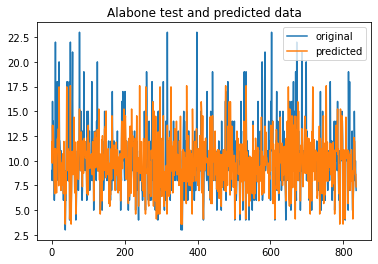

In [586]:
ax = range(len(y_test))
plt.plot(ax,y_test,label='original')
plt.plot(ax,y_pred_dt, label = 'predicted')
plt.title('Alabone test and predicted data')
plt.legend()
plt.show()

4. Create a random forest model tuned to the best of your abilities. Explain how you tuned it

In [587]:
from sklearn.ensemble import RandomForestRegressor
X = df_abalone.drop('Rings',axis=1)# Features
y = df_abalone['Rings']# Target

from sklearn.model_selection import train_test_split
# Split into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [588]:
# Instantiate a random forests regressor'rf' 400 estimators
rf = RandomForestRegressor(random_state = 42)

In [589]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [590]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
params_rf = {'n_estimators': [50,100,150,200,250],
            'max_depth': [4,6,8,10,12],
            'min_samples_leaf': [0.001,0.002,0.003,0.004,0.005],
            'max_features': [0.5,1,'log2','sqrt']}

In [591]:
grid_rf = GridSearchCV(estimator = rf,
                      param_grid=params_rf,
                      cv=3,
                      scoring='neg_mean_squared_error',
                      verbose=1,
                      n_jobs=-1)

In [592]:
# fit 'rf'to the training set
grid_rf.fit(X_train,y_train)


Fitting 3 folds for each of 500 candidates, totalling 1500 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'max_features': [0.5, 1, 'log2', 'sqrt'],
                         'min_samples_leaf': [0.001, 0.002, 0.003, 0.004,
                                              0.005],
                         'n_estimators': [50, 100, 150, 200, 250]},
             scoring='neg_mean_squared_error', verbose=1)

In [593]:
best_hyperparams = grid_rf.best_params_
print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 12, 'max_features': 0.5, 'min_samples_leaf': 0.002, 'n_estimators': 250}


In [594]:
# Extract the best model from 'grid_rf'
best_model = grid_rf.best_estimator_
#Predict the test set labels
y_pred_rf = best_model.predict(X_test)
# Evaluate the test set RMSE
rmse_test_rf = MSE(y_test,y_pred_rf)**(1/2)
#Print the test set RMSE
print('Test set RMSE of rf:{:.2f}'.format(rmse_test_rf))


Test set RMSE of rf:2.13


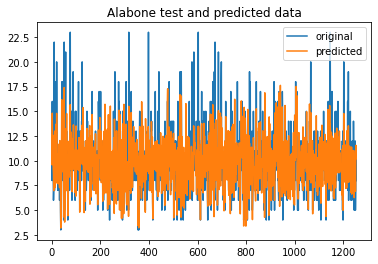

In [595]:
ax = range(len(y_test))
plt.plot(ax,y_test,label='original')
plt.plot(ax,y_pred_rf, label = 'predicted')
plt.title('Alabone test and predicted data')
plt.legend()
plt.show()

feature importance

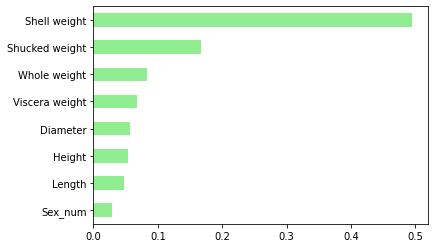

In [342]:
import matplotlib.pyplot as plt
rf_fit = rf.fit(X_train,y_train)
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
#Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh',color = 'lightgreen');
plt.show()

5. Create an xgboost model tuned to the best of your abilities. Explain how you tuned it

In [15]:
from xgboost import XGBRegressor
X = df_abalone.drop('Rings',axis=1)# Features
y = df_abalone['Rings']# Target

from sklearn.model_selection import train_test_split
# Split into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [16]:
xg_reg = XGBRegressor(random_state=42)


In [17]:
print(xg_reg.get_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'enable_categorical': False, 'gamma': None, 'gpu_id': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_delta_step': None, 'max_depth': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [18]:
from sklearn.model_selection import GridSearchCV
# Define the grid of hyperparameters 'params_xg_reg'
params_xg_reg = {
                'max_depth': [3, 4, 5, 6, 8,10,12,15],
                'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
                'min_child_weight':[1,10,100],
                'colsample_bytree': [0.3,0.4,0.5,0.7],
                 
                'gamma': [0.0,0.1,0.2,0.3,0.4]}

In [19]:
grid_xg_reg = GridSearchCV(estimator = xg_reg,
                          param_grid = params_xg_reg,
                          scoring = 'neg_mean_squared_error',
                          cv=3,
                          verbose=1,
                          n_jobs = -1)

In [20]:
grid_xg_reg.fit(X_train,y_train)

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=-1,
       

In [21]:

best_hyperpara = grid_xg_reg.best_params_
print('Best hyperparameters:\n', best_hyperpara)

Best hyperparameters:
 {'colsample_bytree': 0.7, 'gamma': 0.3, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 1}


In [23]:
from sklearn.metrics import mean_squared_error as MSE
# Extract the best model from 'grid_xg_reg'
best_model = grid_xg_reg.best_estimator_
#Predict the test set labels
y_pred = best_model.predict(X_test)
# Evaluate the test set RMSE
rmse_test = MSE(y_test,y_pred)**(1/2)
#Print the test set RMSE
print('Test set RMSE of XGBoost:{:.2f}'.format(rmse_test))

Test set RMSE of XGBoost:2.16


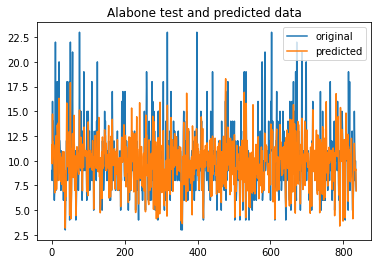

In [555]:
ax = range(len(y_test))
plt.plot(ax,y_test,label='original')
plt.plot(ax,y_pred, label = 'predicted')
plt.title('Alabone test and predicted data')
plt.legend()
plt.show()

6. Which model performed best? What is your performance metric? Why?

I chose RMSE as my metric because of the following:
1. I am predicting a continuous variable.
2. RMSE penalizes for larger errors due to squaring and I'd rather minimize larger errors.
3. RMSE values are in the same unit as the target variable (rings) which makes interpretation of metrics easier and more intuitive.
Random Forest model performed best with lowest RMSE because it took less time then others while its RMSE was 2.13 which is lower then RMSEs for other models.
XGBRegressor model took the most time and its RMSE was 2.16 after extensive tuning (before tuning it was 2.31). 
Desicion Tree model was quick, but its RMSE was higher then others: initially it was 2.50 and with tuning it reached 2.38.

Randomized feature selection makes random forest much more accurate than a decision tree. 

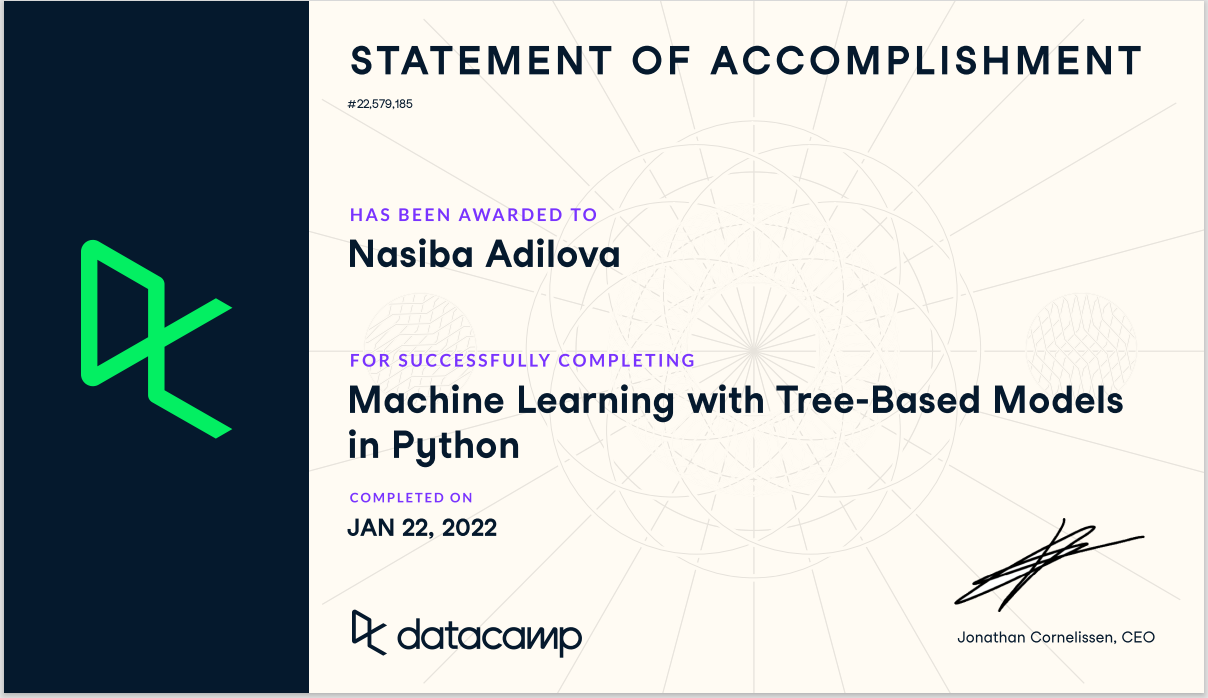